# 분류 모델 - Naive Bayes model

** 확률변수의 독립, 조건부 독립**
- A와 B가 독립이면 결합확률은 주변확률의 곱과 같다.
   - P(A, B) = P(A)P(B)
- A,B가 C에 대해 조건부 독립이면, C에 대한 A,B의 결합조건부확률은 C에 대한 A,B의 조건부확률의 곱과 같다.
   - P(A, B | C) = P(A | C)P(B | C)
   - P(A | B, C) = P(A | C)
   - P(B | A, C) = P(B | C)
- 조건부 독립에서 보면 일반적인 독립은 무조건부 독립과 같다.
- 조건부 독립과 무조건부 독립은 관계가 없다.

** 정의 **
- 조건부확률 P(y=k|x)를 구하기 위해 베이즈 정리를 사용할 때, 가능도를 구하는 것이 문제이다.
   - P(x | y=k) = P(x1, ..., xD | y=k)
   - 조건부확률은 x1, ..., xD의 결합확률이 된다.
- 원리상으로 y=k인 데이터만 모아서 가능도 함수의 모양을 추정할 수 있지만, D가 커지면 가능도 함수의 추정이 어려워진다. (D=데이터의 갯수)
- 나이브 베이즈 모델은 가능도를 나이브 가정을 사용하여 정의 한다.
   - 나이브 가정 naive assumption : 모든 차원의 개별 독립변수가 서로 조건부 독립이라는 가정
   - 나이브 가정을 사용하면 벡터 x의 결합확률분포함수는 개별 스칼라 원소 x_d의 확률분포함수의 곱이다.
      - P(x_1,...,x_D | y=k) = prod_d=1_D P(x_d | y=k)
   - x_d의 확률분포함수는 결합확률분포함수보다 추정이 쉽다.
   - 가능도에 나이브 가정식을 대입하여 베이즈 정리를 계산한다. 

** 나이브 베이즈 모델의 종류 **
- 베이즈 정리의 가능도를 구하기 위해서 나이브 가정을 사용할 때, 원소 x_d의 확률분포함수를 어떤 것으로 정의하느냐에 따라서 종류가 달라진다.
- 정규분포 가능도 모형 (GaussianNB : 정규분포 나이브 베이즈)
   - x 벡터의 원소 x_d가 모두 실수, 클래스 k마다 특정한 값 주변에서 발생할때 가능도 분포로 정규분포를 사용한다.
   - 즉 정규분포인 x_d의 확률분포들의 곱을 구하면 가능도를 구할 수 있다.
   - QDA와 달리 모든 독립변수들이 서로 조건부독립이라고 가정한다.
- 베르누이분포 가능도 모형(BernouliNB : 베르누이분포 나이브베이즈)
   - x_d가 0또는 1만 가질 수 있는 베르누이 분포 형태
   - 독립변수가 동전세트로 이루어진 형태와 같다. (독립변수 1이 D번 시행한 동전과 같음)
   - 또한 y=k 마다 x_d의 1이 될 확률이 다르다. 따라서 D x K개의 동전 세트와 같다.
   - 베르누이분포 가능도 모형을 기반으로 하는 나이브 베이즈 모형은 동전 세트를 N번 던진 결과로부터 1~K 중 어느 동전 세트를 던졌는지를 찾아내는 모형과 같다.
- 다항분포 가능도 모형(MultinomialNB : 다항분포 나이브 베이즈)
   - x벡터가 다항분포의 표본이라고 가정한다.
   - D개의 면을 가지는 주사위를 sum_x=1_D x_d 만큼 던져서 나온 결과와 같다.
   - x = (1, 4, 0, 5) 이면
      - d=4
      - N=10
      - 1이 1번, 2가 4번, 3이 0번, 4가 5번 나온 결과와 같다.
   - 각 클래스마다 주사위가 다르다고 가정하면, D개의 면을 가진 주사위가 K개 있는 것과 같다.
   - 다항분포 가능도 모형을 기반으로하는 나이브 베이즈 모형은 주사위를 던진 결과로부터 1~K 중 어느 주사위를 던졌는지 찾는 모형과 같다.

** sklearn naive bayes model **
- GaussianNB : 정규분포 나이브 베이즈 모형
- BernoulliNB : 베르누이분포 나이브 베이즈 모형
- MultinomialNB : 다항분포 나이브 베이즈 모형


# Gaussian Naive bayse model

In [1]:
np.random.seed(0)
rv0 = sp.stats.multivariate_normal([-2, -2], [[1, 0.9], [0.9, 2]])
rv1 = sp.stats.multivariate_normal([2, 2], [[1.2, -0.8], [-0.8, 2]])
X0 = rv0.rvs(40)
X1 = rv1.rvs(60)
X = np.vstack([X0, X1])
y = np.hstack([np.zeros(40), np.ones(60)])

X.shape, y.shape

((100, 2), (100,))

In [3]:
X[:5]

array([[-3.65937565, -4.27892515],
       [-4.11410669, -2.56217408],
       [-2.92859796, -4.89992211],
       [-2.67683553, -3.35500055],
       [-2.1594698 , -1.71569175]])

In [4]:
y[:5]

array([0., 0., 0., 0., 0.])

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)

In [19]:
test_xx1 = np.linspace(-5, 5, 5)
test_xx2 = np.linspace(-5, 5, 5)

test_xx1, test_xx2

(array([-5. , -2.5,  0. ,  2.5,  5. ]), array([-5. , -2.5,  0. ,  2.5,  5. ]))

In [20]:
test_XX1, test_XX2 = np.meshgrid(test_xx1, test_xx2)
test_XX1, test_XX2

(array([[-5. , -2.5,  0. ,  2.5,  5. ],
        [-5. , -2.5,  0. ,  2.5,  5. ],
        [-5. , -2.5,  0. ,  2.5,  5. ],
        [-5. , -2.5,  0. ,  2.5,  5. ],
        [-5. , -2.5,  0. ,  2.5,  5. ]]),
 array([[-5. , -5. , -5. , -5. , -5. ],
        [-2.5, -2.5, -2.5, -2.5, -2.5],
        [ 0. ,  0. ,  0. ,  0. ,  0. ],
        [ 2.5,  2.5,  2.5,  2.5,  2.5],
        [ 5. ,  5. ,  5. ,  5. ,  5. ]]))

In [21]:
test_XX1.T

array([[-5. , -5. , -5. , -5. , -5. ],
       [-2.5, -2.5, -2.5, -2.5, -2.5],
       [ 0. ,  0. ,  0. ,  0. ,  0. ],
       [ 2.5,  2.5,  2.5,  2.5,  2.5],
       [ 5. ,  5. ,  5. ,  5. ,  5. ]])

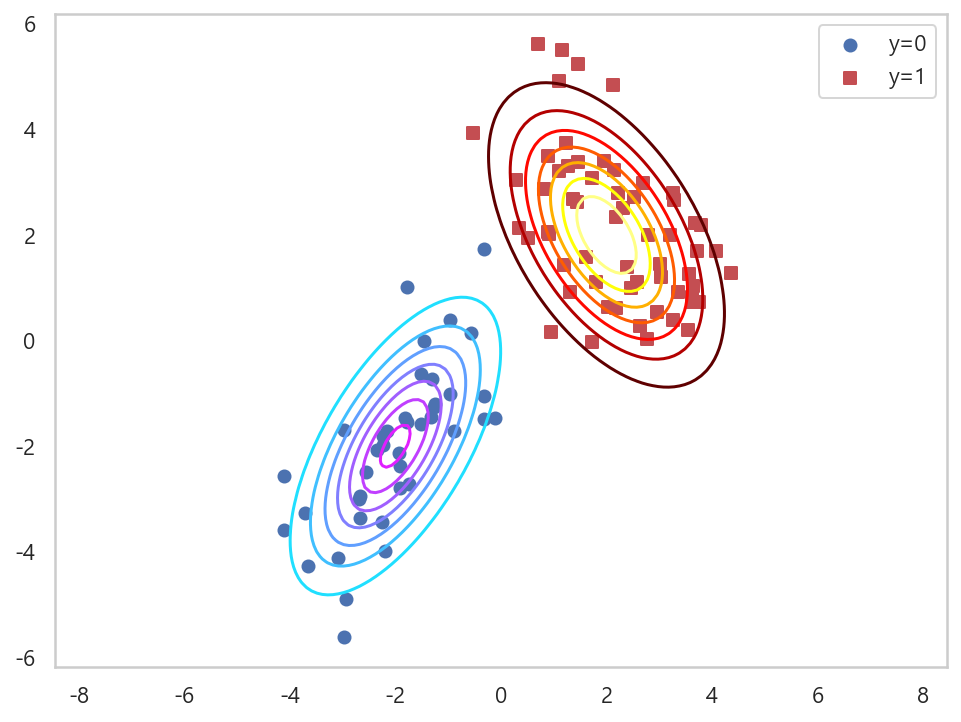

In [22]:
plt.figure(figsize=(8, 6))
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot)
plt.scatter(X0[:, 0], X0[:, 1], marker="o", c="b", label="y=0")
plt.scatter(X1[:, 0], X1[:, 1], marker="s", c="r", label="y=1")
plt.legend()
plt.grid(False)
plt.axis("equal")
plt.show() ; 

In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
model_norm = GaussianNB().fit(X, y)
model_norm

GaussianNB()

### class의 종류

In [25]:
model_norm.classes_

array([0., 1.])

### class 별 표본의 수

In [26]:
model_norm.class_count_

array([40., 60.])

### class 별 사전 확률

In [27]:
model_norm.class_prior_

array([0.4, 0.6])

### class 별 x가 이루는 분포의 통계값

In [28]:
model_norm.theta_

array([[-1.96197643, -2.00597903],
       [ 2.19130701,  2.12626716]])

In [32]:
model_norm.sigma_

array([[1.02398854, 2.31390497],
       [1.25429371, 1.93742544]])

In [33]:
# class 0 인 x 표본의 분포의 기대값과 분산

model_norm.theta_[0], model_norm.sigma_[0]

(array([-1.96197643, -2.00597903]), array([1.02398854, 2.31390497]))

In [34]:
# class 1인 x 표본의 분포의 기댓값과 분산

model_norm.theta_[1], model_norm.sigma_[1]

(array([2.19130701, 2.12626716]), array([1.25429371, 1.93742544]))

### gaussian model로 구한 데이터의 확률분포를 나타내기

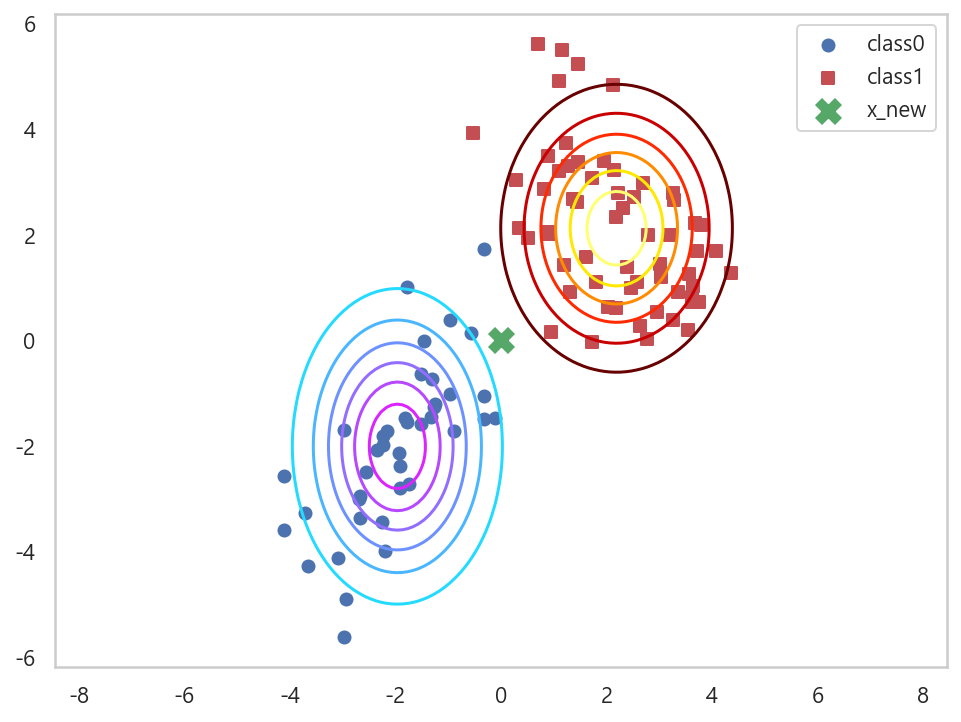

In [44]:
rv0 = sp.stats.multivariate_normal(model_norm.theta_[0], model_norm.sigma_[0])
rv1 = sp.stats.multivariate_normal(model_norm.theta_[1], model_norm.sigma_[1])

xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)

plt.figure(figsize=(8, 6))
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot)
plt.scatter(X0[:, 0], X0[:, 1], marker="o", c="b", label="class0")
plt.scatter(X1[:, 0], X1[:, 1], marker="s", c="r", label="class1")

x_new = [0, 0]
plt.scatter(x_new[0], x_new[1], marker="x", c="g", s=100, linewidth=5, label="x_new")

plt.legend()
plt.grid(False)
plt.axis("equal")
plt.show() ; 

### x_new 에 대한 모형의 예측값

In [46]:
model_norm.predict_proba([x_new])

array([[0.48475244, 0.51524756]])

In [52]:
model_norm.predict_proba(np.array(x_new).reshape(1, -1))

array([[0.48475244, 0.51524756]])

In [56]:
np.array(x_new), np.array(x_new).reshape(1, -1)

(array([0, 0]), array([[0, 0]]))

### gaussian NB 모델에서 예측값이 나오는 과정

In [59]:
# 가능도의 계산 : 정규분포의 확률밀도 함수의 곱

likelihood = [(sp.stats.norm(model_norm.theta_[0][0], np.sqrt(model_norm.sigma_[0][0])).pdf(x_new[0]) * \
               sp.stats.norm(model_norm.theta_[0][1], np.sqrt(model_norm.sigma_[0][1])).pdf(x_new[1])),
              (sp.stats.norm(model_norm.theta_[1][0], np.sqrt(model_norm.sigma_[1][0])).pdf(x_new[0]) * \
               sp.stats.norm(model_norm.theta_[1][1], np.sqrt(model_norm.sigma_[1][1])).pdf(x_new[1]))]

likelihood

[0.006615760017637307, 0.004687965595148289]

In [62]:
# 조건부확률 = 가능도 x 사전확률

posterior = likelihood * model_norm.class_prior_
posterior

array([0.0026463 , 0.00281278])

In [63]:
# 정규화를 하면 x_new에 대한 예측값과 같다.

posterior / posterior.sum()

array([0.48475244, 0.51524756])

## GaussianNB with iris data 

In [65]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [66]:
from sklearn.naive_bayes import GaussianNB

In [67]:
gnb = GaussianNB().fit(X, y)
gnb

GaussianNB()

In [69]:
gnb.classes_

array([0, 1, 2])

In [71]:
gnb.class_prior_

array([0.33333333, 0.33333333, 0.33333333])

In [72]:
gnb.theta_

array([[5.006, 3.428, 1.462, 0.246],
       [5.936, 2.77 , 4.26 , 1.326],
       [6.588, 2.974, 5.552, 2.026]])

In [73]:
gnb.sigma_

array([[0.121764, 0.140816, 0.029556, 0.010884],
       [0.261104, 0.0965  , 0.2164  , 0.038324],
       [0.396256, 0.101924, 0.298496, 0.073924]])

In [74]:
from sklearn.metrics import confusion_matrix
y_pred = gnb.predict(X)

print(confusion_matrix(y, y_pred))

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


In [75]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



# Bernoulli Naive Bayse Model

## 4세트의 동전, 4개의 키워드

In [78]:
X = np.array([
    [0, 1, 1, 0],
    [1, 1, 1, 1],
    [1, 1, 1, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1],
    [0, 1, 1, 0],
    [0, 1, 1, 1],
    [1, 0, 1, 0],
    [1, 0, 1, 1],
    [0, 1, 1, 0]])
X

array([[0, 1, 1, 0],
       [1, 1, 1, 1],
       [1, 1, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [0, 1, 1, 1],
       [1, 0, 1, 0],
       [1, 0, 1, 1],
       [0, 1, 1, 0]])

In [79]:
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
y

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [80]:
from sklearn.naive_bayes import BernoulliNB

In [81]:
bnb = BernoulliNB().fit(X, y)
bnb

BernoulliNB()

### class 의 종류

In [83]:
bnb.classes_

array([0, 1])

### class 별 표본 수

In [86]:
bnb.class_count_

array([4., 6.])

### class 별 사전확률

In [88]:
np.exp(bnb.class_log_prior_)

array([0.4, 0.6])

### class의 d번째 동전의 앞면이 나온 횟수
- class 별 d번째 키워드가 나온 횟수

In [90]:
fc = bnb.feature_count_
fc

array([[2., 4., 3., 1.],
       [2., 3., 5., 3.]])

### class의 d번째 동전의 모수
- class 별 d번째 키워드의 확률분포의 모수

In [93]:
bnb.class_count_[:, np.newaxis]

array([[4.],
       [6.]])

In [94]:
np.repeat(bnb.class_count_[:, np.newaxis], 4, axis=1)

array([[4., 4., 4., 4.],
       [6., 6., 6., 6.]])

In [95]:
fc / np.repeat(bnb.class_count_[:, np.newaxis], 4, axis=1)

array([[0.5       , 1.        , 0.75      , 0.25      ],
       [0.33333333, 0.5       , 0.83333333, 0.5       ]])

### 스무딩이 적용된 모수
- 모수가 0, 1과 같이 극단적인 값이 나오지 않도록 0.5에 가깝게 조정하는 방법
- 라플라스 스무딩, 애드윈 스무딩
   - 알파 가중치에 따라서 스무딩의 정도가 달라진다.

In [97]:
np.exp(bnb.feature_log_prob_)

array([[0.5       , 0.83333333, 0.66666667, 0.33333333],
       [0.375     , 0.5       , 0.75      , 0.5       ]])

In [99]:
bnb.alpha

1.0

### 새로운 표본의 예측값

In [104]:
x_new = np.array([0, 1, 1, 1])

bnb.predict_proba([x_new])

array([[0.34501348, 0.65498652]])

In [105]:
x_new = np.array([0, 0, 1, 1])

bnb.predict_proba([x_new])

array([[0.09530901, 0.90469099]])

## mnist digit data

In [2]:
from sklearn.datasets import load_digits

digit = load_digits()
X = digit.data
y = digit.target

In [3]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [5]:
from sklearn.preprocessing import Binarizer

In [8]:
X_bin = Binarizer(threshold=7).fit_transform(X)
X_bin[0]

array([0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.])

### 2진화 하기 전, 후

In [9]:
%matplotlib inline

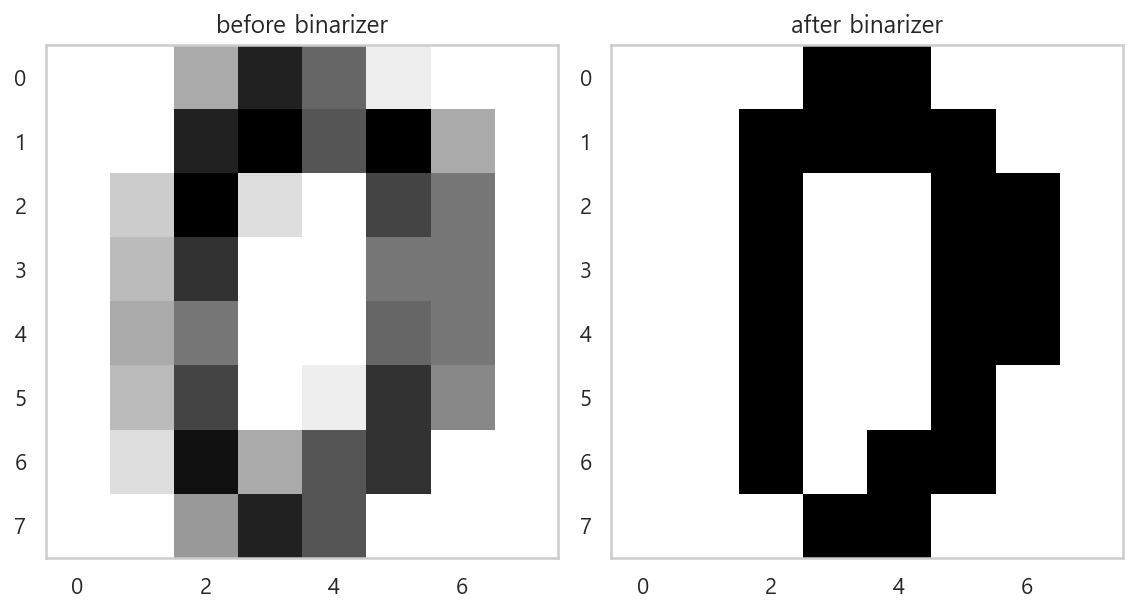

In [15]:
plt.figure(figsize=(8, 8))
plt.subplot(121)
plt.imshow(X[0, :].reshape(8, 8), cmap=plt.cm.binary)
plt.title("before binarizer")
plt.grid(False) 

plt.subplot(122)
plt.imshow(X_bin[0, :].reshape(8, 8), cmap=plt.cm.binary)
plt.title("after binarizer")
plt.grid(False)

plt.tight_layout()
plt.show() ;

### 이진화 전후 데이터에 대한 모형 테스트

In [19]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import (confusion_matrix, classification_report)

In [24]:
bnb = BernoulliNB()
bnb.fit(X, y)
y_pred = bnb.predict(X)

print(confusion_matrix(y, y_pred))

[[175   1   0   0   2   0   0   0   0   0]
 [  0 112  21   0   3   1   1   1  32  11]
 [  0   6 153   6   0   0   0   1  11   0]
 [  1   1   3 157   0   2   0   3   7   9]
 [  0   1   0   0 172   0   0   7   1   0]
 [  2   3   0   2   1 149   2   0   3  20]
 [  0   5   0   0   2   2 171   0   1   0]
 [  0   0   0   0   3   0   0 175   1   0]
 [  0  13   1   4   0   3   2   2 142   7]
 [  0   6   0   3   7   3   0   9   6 146]]


In [25]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       178
           1       0.76      0.62      0.68       182
           2       0.86      0.86      0.86       177
           3       0.91      0.86      0.88       183
           4       0.91      0.95      0.93       181
           5       0.93      0.82      0.87       182
           6       0.97      0.94      0.96       181
           7       0.88      0.98      0.93       179
           8       0.70      0.82      0.75       174
           9       0.76      0.81      0.78       180

    accuracy                           0.86      1797
   macro avg       0.87      0.86      0.86      1797
weighted avg       0.87      0.86      0.86      1797



In [26]:
bnb.fit(X_bin, y)

y_pred = bnb.predict(X_bin)

print(confusion_matrix(y, y_pred))

[[173   0   0   0   2   1   1   0   1   0]
 [  0 145   9   0   0   1   2   0  16   9]
 [  0   7 159   3   0   0   0   2   4   2]
 [  0   3   2 156   0   2   0   5   5  10]
 [  0   4   0   0 170   0   0   4   3   0]
 [  0   1   0   3   2 161   1   0   0  14]
 [  1   3   0   0   1   0 174   0   2   0]
 [  0   0   1   0   1   0   0 177   0   0]
 [  0  15   2   2   0   6   1   0 143   5]
 [  0   3   1   3   1   4   0   7   4 157]]


In [27]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       178
           1       0.80      0.80      0.80       182
           2       0.91      0.90      0.91       177
           3       0.93      0.85      0.89       183
           4       0.96      0.94      0.95       181
           5       0.92      0.88      0.90       182
           6       0.97      0.96      0.97       181
           7       0.91      0.99      0.95       179
           8       0.80      0.82      0.81       174
           9       0.80      0.87      0.83       180

    accuracy                           0.90      1797
   macro avg       0.90      0.90      0.90      1797
weighted avg       0.90      0.90      0.90      1797



In [30]:
bnb_bin = BernoulliNB(binarize=7).fit(X, y)
y_pred = bnb_bin.predict(X)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       178
           1       0.80      0.80      0.80       182
           2       0.91      0.90      0.91       177
           3       0.93      0.85      0.89       183
           4       0.96      0.94      0.95       181
           5       0.92      0.88      0.90       182
           6       0.97      0.96      0.97       181
           7       0.91      0.99      0.95       179
           8       0.80      0.82      0.81       174
           9       0.80      0.87      0.83       180

    accuracy                           0.90      1797
   macro avg       0.90      0.90      0.90      1797
weighted avg       0.90      0.90      0.90      1797



## Multinomial NB Model
- 클래스 k 0, 1 별로 4가지 키워드가 나온 현황
   - 즉 정상메일과 스팸메일이 각각 4개, 6개 있고
   - 각 메일별 키워드 4개가 몇개씩 들어있는지에 대한 데이터
- 또는 4면체 주사위를 각 클래스별 총합의 수만큼 던졌을 때 주사위 면이 나온 횟수    

In [1]:
X = np.array([
    [3, 4, 1, 2],
    [3, 5, 1, 1],
    [3, 3, 0, 4],
    [3, 4, 1, 2],
    [1, 2, 1, 4],
    [0, 0, 5, 3],
    [1, 2, 4, 1],
    [1, 1, 4, 2],
    [0, 1, 2, 5],
    [2, 1, 2, 3]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [2]:
X.shape, y.shape

((10, 4), (10,))

### 사전 확률

In [3]:
from sklearn.naive_bayes import MultinomialNB

In [5]:
mnb = MultinomialNB().fit(X, y)
mnb

MultinomialNB()

In [8]:
mnb.classes_

array([0, 1])

In [9]:
mnb.class_count_

array([4., 6.])

In [10]:
np.exp(mnb.class_log_prior_)

array([0.4, 0.6])

### 클래스별 가능도 확률분포
- 클래스 0 정상메일은 키워드 1~4가 각각 12, 16, 3, 9번 나왔다.
   - 또는 클래스 0인 주사위를 40번 던진 상황에서 각 면이 몇번씩 나왔는지에 대한 정보
- 클래스 1 스팸메일은 키워드 1~4가 각각 5, 7, 18, 18번 나왔다.
   - 또는 클래스 1인 주사위를 48번 던진 상황에서 각 면이 몇번씩 나왔는지에 대한 정보

In [12]:
fc = mnb.feature_count_
fc

array([[12., 16.,  3.,  9.],
       [ 5.,  7., 18., 18.]])

In [14]:
fc[0].sum(), fc[1].sum()

(40.0, 48.0)

### 클래스 별 각 면(혹은 키워드)이 나올 확률
- 모수값
- 이 값에 0.075 같은 극단적인 값을 제거하기 위해 alpha=1 스무딩을 적용한다.

In [17]:
np.repeat(fc.sum(axis=1)[:, np.newaxis], 4, axis=1)

array([[40., 40., 40., 40.],
       [48., 48., 48., 48.]])

In [15]:
fc / np.repeat(fc.sum(axis=1)[:, np.newaxis], 4, axis=1)

array([[0.3       , 0.4       , 0.075     , 0.225     ],
       [0.10416667, 0.14583333, 0.375     , 0.375     ]])

In [19]:
# 스무딩 적용

(fc + mnb.alpha) / \
(np.repeat(fc.sum(axis=1)[:, np.newaxis], 4, axis=1) + mnb.alpha * X.shape[1])

array([[0.29545455, 0.38636364, 0.09090909, 0.22727273],
       [0.11538462, 0.15384615, 0.36538462, 0.36538462]])

### 모수 추정치
- 위에서 구한 스무딩 값과 같다.

In [21]:
theta = np.exp(mnb.feature_log_prob_)
theta

array([[0.29545455, 0.38636364, 0.09090909, 0.22727273],
       [0.11538462, 0.15384615, 0.36538462, 0.36538462]])

### 이 모수값 추정치를 사용하여 예측

In [24]:
# 스펨메일 k=1 일 확률 60%

x_new = np.array([10, 10, 10, 10])
mnb.predict_proba([x_new])

array([[0.38848858, 0.61151142]])

In [26]:
# 정상메일 k=0 일 확률 87%

x_new = np.array([10, 10, 10, 5])
mnb.predict_proba([x_new])

array([[0.87217513, 0.12782487]])

### 다항 분포의 확률질량함수를 사용하여 확률 계산

In [28]:
p = (theta ** x_new).prod(axis=1) * np.exp(mnb.class_log_prior_)
p / p.sum()

array([0.87217513, 0.12782487])

### MultinomialNB with digits data
- 이진화한 데이터를 베르누이 나이브 베이즈 모형으로 분석한 결과와 성능 비교
- 다항분포 나이브 베이즈 모형과 베르누이분포 나이브 베이즈 모형의 성능이 비슷하다.

In [29]:
from sklearn.datasets import load_digits

In [30]:
digits = load_digits()
X = digits.data
y = digits.target

In [31]:
X[:2]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [32]:
y[:2]

array([0, 1])

In [34]:
from sklearn.metrics import classification_report

In [35]:
mnb = MultinomialNB()
mnb.fit(X, y)
y_pred = mnb.predict(X)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       178
           1       0.87      0.75      0.81       182
           2       0.90      0.90      0.90       177
           3       0.99      0.87      0.93       183
           4       0.96      0.96      0.96       181
           5       0.97      0.86      0.91       182
           6       0.98      0.97      0.98       181
           7       0.89      0.99      0.94       179
           8       0.78      0.89      0.83       174
           9       0.76      0.88      0.82       180

    accuracy                           0.91      1797
   macro avg       0.91      0.91      0.91      1797
weighted avg       0.91      0.91      0.91      1797



#### 속성값

In [41]:
# 클래스 종류

mnb.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [40]:
# 클래스 별 사전확률

mnb.class_log_prior_

array([-2.31209034, -2.2898672 , -2.31772415, -2.28438773, -2.29537686,
       -2.2898672 , -2.29537686, -2.30648808, -2.33481859, -2.30091704])

In [43]:
# 클래스별 분포

mnb.class_count_

array([178., 182., 177., 183., 181., 182., 181., 179., 174., 180.])

In [46]:
y[y==0].shape, y[y==1].shape

((178,), (182,))

In [50]:
# 클래스별 64개의 키워드 등장 횟수

fc = mnb.feature_count_
fc.shape

(10, 64)

In [51]:
# 클래스별 키워드별 확률

fc / np.repeat(fc.sum(axis=1)[:, np.newaxis], 64, axis=1)

array([[0.00000000e+00, 7.09031286e-05, 1.32057077e-02, 4.13187982e-02,
        3.56465479e-02, 9.23513250e-03, 1.06354693e-04, 0.00000000e+00,
        0.00000000e+00, 2.80067358e-03, 3.96880262e-02, 4.21873615e-02,
        3.62669503e-02, 3.58947089e-02, 3.04883453e-03, 0.00000000e+00,
        0.00000000e+00, 1.17699193e-02, 4.50412124e-02, 1.66090579e-02,
        6.62944252e-03, 3.83940441e-02, 1.11140654e-02, 0.00000000e+00,
        0.00000000e+00, 1.66976868e-02, 4.01134450e-02, 6.29265266e-03,
        4.43144554e-04, 2.85916866e-02, 2.03491979e-02, 0.00000000e+00,
        0.00000000e+00, 1.85234423e-02, 3.64619339e-02, 2.81839936e-03,
        1.41806257e-04, 2.76876717e-02, 2.24762918e-02, 0.00000000e+00,
        0.00000000e+00, 1.10254365e-02, 4.19214748e-02, 5.21137995e-03,
        4.83913853e-03, 3.56819995e-02, 1.84702650e-02, 0.00000000e+00,
        0.00000000e+00, 2.51706107e-03, 4.11947177e-02, 3.14278118e-02,
        3.26508907e-02, 4.18151201e-02, 7.62208632e-03, 0.000000

In [53]:
# 스무딩을 적용한 확률값

(fc + mnb.alpha) / \
(np.repeat(fc.sum(axis=1)[:, np.newaxis], 64, axis=1) + mnb.alpha * X.shape[1])

array([[1.77056959e-05, 8.85284796e-05, 1.32084492e-02, 4.12896829e-02,
        3.56238602e-02, 9.24237327e-03, 1.23939871e-04, 1.77056959e-05,
        1.77056959e-05, 2.81520565e-03, 3.96607589e-02, 4.21572620e-02,
        3.62435596e-02, 3.58717399e-02, 3.06308539e-03, 1.77056959e-05,
        1.77056959e-05, 1.17742878e-02, 4.50078790e-02, 1.66079428e-02,
        6.63963597e-03, 3.83682431e-02, 1.11191770e-02, 1.77056959e-05,
        1.77056959e-05, 1.66964713e-02, 4.00856956e-02, 6.30322775e-03,
        4.60348094e-04, 2.85769932e-02, 2.03438446e-02, 1.77056959e-05,
        1.77056959e-05, 1.85201579e-02, 3.64383222e-02, 2.83291135e-03,
        1.59351263e-04, 2.76740027e-02, 2.24685281e-02, 1.77056959e-05,
        1.77056959e-05, 1.10306486e-02, 4.18916766e-02, 5.22318030e-03,
        4.85136068e-03, 3.56592716e-02, 1.84670408e-02, 1.77056959e-05,
        1.77056959e-05, 2.53191452e-03, 4.11657430e-02, 3.14099046e-02,
        3.26315976e-02, 4.17854424e-02, 7.63115494e-03, 1.770569

In [54]:
# 모수의 추정치

theta = np.exp(mnb.feature_log_prob_)
theta

array([[1.77056959e-05, 8.85284796e-05, 1.32084492e-02, 4.12896829e-02,
        3.56238602e-02, 9.24237327e-03, 1.23939871e-04, 1.77056959e-05,
        1.77056959e-05, 2.81520565e-03, 3.96607589e-02, 4.21572620e-02,
        3.62435596e-02, 3.58717399e-02, 3.06308539e-03, 1.77056959e-05,
        1.77056959e-05, 1.17742878e-02, 4.50078790e-02, 1.66079428e-02,
        6.63963597e-03, 3.83682431e-02, 1.11191770e-02, 1.77056959e-05,
        1.77056959e-05, 1.66964713e-02, 4.00856956e-02, 6.30322775e-03,
        4.60348094e-04, 2.85769932e-02, 2.03438446e-02, 1.77056959e-05,
        1.77056959e-05, 1.85201579e-02, 3.64383222e-02, 2.83291135e-03,
        1.59351263e-04, 2.76740027e-02, 2.24685281e-02, 1.77056959e-05,
        1.77056959e-05, 1.10306486e-02, 4.18916766e-02, 5.22318030e-03,
        4.85136068e-03, 3.56592716e-02, 1.84670408e-02, 1.77056959e-05,
        1.77056959e-05, 2.53191452e-03, 4.11657430e-02, 3.14099046e-02,
        3.26315976e-02, 4.17854424e-02, 7.63115494e-03, 1.770569

In [56]:
# 예측

x_new_num = np.array(
      [ 0.,  0.,  0.,  1., 14., 13.,  1.,  0.,  15.,  0.,  0.,  1., 16.,
       16.,  3.,  0.,  0.,  5., 11., 15., 16., 16.,  0.,  0.,  0.,  4.,
       15., 16., 16., 15.,  0.,  0.,  10.,  0.,  0.,  8., 16.,  7.,  0.,
        0.,  0.,  0.,  0., 10., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  8.,
       16.,  6.,  0.,  0.,  0.,  0.,  0.,  10., 13., 15.,  2.,  0.])

x_new_num

array([ 0.,  0.,  0.,  1., 14., 13.,  1.,  0., 15.,  0.,  0.,  1., 16.,
       16.,  3.,  0.,  0.,  5., 11., 15., 16., 16.,  0.,  0.,  0.,  4.,
       15., 16., 16., 15.,  0.,  0., 10.,  0.,  0.,  8., 16.,  7.,  0.,
        0.,  0.,  0.,  0., 10., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  8.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 10., 13., 15.,  2.,  0.])

In [59]:
np.argmax(mnb.predict_proba([x_new_num]))

1

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
from sklearn.preprocessing import Binarizer

In [68]:
bin_x_new_num = Binarizer(threshold=7).fit_transform(x_new_num.reshape(1, -1))
bin_x_new_num

array([[0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
        0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
        1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
        0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.]])

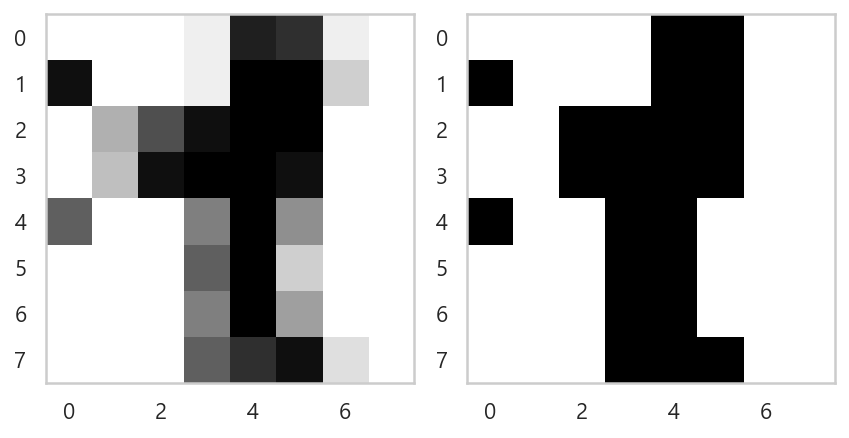

In [69]:
plt.figure(figsize=(6, 6))
plt.subplot(121)
plt.imshow(x_new_num.reshape(8, 8), cmap=mpl.cm.binary)
plt.grid(False)

plt.subplot(122)
plt.imshow(bin_x_new_num.reshape(8, 8), cmap=mpl.cm.binary)
plt.grid(False)

plt.tight_layout()
plt.show() ; 

In [37]:
from sklearn.naive_bayes import BernoulliNB

In [38]:
bnb = BernoulliNB(binarize=7)
bnb.fit(X, y)
y_pred = bnb.predict(X)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       178
           1       0.80      0.80      0.80       182
           2       0.91      0.90      0.91       177
           3       0.93      0.85      0.89       183
           4       0.96      0.94      0.95       181
           5       0.92      0.88      0.90       182
           6       0.97      0.96      0.97       181
           7       0.91      0.99      0.95       179
           8       0.80      0.82      0.81       174
           9       0.80      0.87      0.83       180

    accuracy                           0.90      1797
   macro avg       0.90      0.90      0.90      1797
weighted avg       0.90      0.90      0.90      1797



### 실수, 이진수, 자연수가 혼합되어 있는 데이터의 분석
- 가우시안분포 NB, 베르누이분포 NB, 다항분포 NB를 표본의 특성에 맞게 학습한 뒤
- 각 모델별 가능도를 구하고 
- 각 모델 가능도를 곱하면 전체 예측값을 구할 수 있다.

In [70]:
from sklearn.datasets import fetch_covtype

In [71]:
covt = fetch_covtype()
X = covt.data
y = covt.target

In [72]:
X.shape, y.shape

((581012, 54), (581012,))

In [76]:
y[:5]

array([5, 5, 2, 2, 5])

#### 표본 데이터의 데이터 타입이 구간별로 다르다.

In [81]:
X[: :10][0][0]

2596.0

In [82]:
X[:, 10:][0][0]

1.0

In [83]:
X1 = X[:, :10]
X2 = X[:, 10:]

X1.shape, X2.shape

((581012, 10), (581012, 44))

#### 데이터 특성 별 NB 모델 다르게 학습

In [84]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [86]:
model1 = GaussianNB().fit(X1, y)
model2 = BernoulliNB().fit(X2, y)

prob1 = model1.predict_proba(X1)
prob2 = model2.predict_proba(X2)

In [90]:
prob1[0][0], prob2[0][0]

(0.002042037702632471, 0.3443946525401781)

#### 각 모델별 가능도 계산
- 베르누이분포 NB는 class_prior_ 속성값이 없다.

In [92]:
likelihood_1 = prob1 / model1.class_prior_
likelihood_2 = prob2 / model1.class_prior_

In [93]:
prob = likelihood_1 * likelihood_2 * model1.class_prior_
prob

array([[1.92884483e-03, 1.32830471e+00, 1.21228480e-30, ...,
        1.54641603e-05, 1.30886283e-25, 1.44670042e-15],
       [1.80140939e-03, 1.32847533e+00, 3.43931137e-30, ...,
        1.75318519e-05, 3.07196218e-25, 9.79628975e-16],
       [5.47990911e-03, 1.83874308e+00, 8.31531711e-33, ...,
        3.94043409e-08, 2.12360730e-28, 1.49456028e-12],
       ...,
       [6.45091525e-09, 7.34269162e-03, 6.76151071e+00, ...,
        3.56932025e-04, 1.37410004e+00, 2.33019631e-22],
       [7.99387059e-09, 9.07279455e-03, 6.66578603e+00, ...,
        3.07960191e-04, 1.48648560e+00, 2.22254908e-22],
       [9.95946367e-09, 1.12747913e-02, 6.59004911e+00, ...,
        3.44829354e-04, 1.45848588e+00, 2.50052567e-22]])

In [94]:
prob.shape

(581012, 7)

In [96]:
set(y)

{1, 2, 3, 4, 5, 6, 7}

In [99]:
# np.argmax(axis=1) : 각 행에서 가장 큰 값의 인덱스 반환
# np.argmax(axis=0) : 각 열에서 가장 큰 값의 인덱스 반환

y_pred = np.argmax(prob, axis=1) + 1
y_pred

array([2, 2, 2, ..., 3, 3, 3], dtype=int64)

In [108]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           1       0.66      0.66      0.66    211840
           2       0.75      0.67      0.71    283301
           3       0.64      0.66      0.65     35754
           4       0.34      0.71      0.46      2747
           5       0.18      0.37      0.24      9493
           6       0.36      0.47      0.41     17367
           7       0.43      0.68      0.53     20510

    accuracy                           0.65    581012
   macro avg       0.48      0.60      0.52    581012
weighted avg       0.68      0.65      0.66    581012



In [109]:
model3 = BernoulliNB().fit(X, y)
y_pred = model3.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           1       0.65      0.48      0.55    211840
           2       0.65      0.76      0.70    283301
           3       0.60      0.87      0.71     35754
           4       0.55      0.43      0.48      2747
           5       0.22      0.06      0.10      9493
           6       0.24      0.23      0.23     17367
           7       0.63      0.61      0.62     20510

    accuracy                           0.63    581012
   macro avg       0.51      0.49      0.49    581012
weighted avg       0.63      0.63      0.62    581012

